# Credit Risk & Customer Financial Analysis

#### Objective:
To analyze customer financial and credit data to identify risk patterns, financial stability, and customer segments that help banks make better loan decisions.

#1.DATA LOADING


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
import os
os.getcwd()#current working directory
os.chdir(r'D:\datasetpractice')
os.getcwd()

'D:\\datasetpractice'

In [248]:
credit_test = pd.read_csv('credit_test.csv')

In [249]:
df = credit_test.copy() #To safely perform operations.

#2.UNDERSTANDING THE DATA

In [250]:
# Understand column names
# Check sample values

In [251]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [252]:
df.tail()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
# Rows → number of customers

# Columns → number of features

In [254]:
df.shape  # there are 10353-rows, and 18-columns

(10353, 18)

In [255]:
df.columns # it gives the column name

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [256]:
df.info() #Data types, Missing values, Which columns need cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [257]:
df.describe() #Mean income, Min / Max loan amount, Distribution spread

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


#3.DATA CLEANING

In [258]:
df.duplicated().sum() # there are 352 duplicate records, lets drop  those

np.int64(352)

In [259]:
df = df.drop_duplicates()

In [260]:
df.duplicated().sum()

np.int64(0)

In [261]:
df.isnull().sum() #Counts missing values in each column

Loan ID                            1
Customer ID                        1
Current Loan Amount                1
Term                               1
Credit Score                    1982
Annual Income                   1982
Years in current job             428
Home Ownership                     1
Purpose                            1
Monthly Debt                       1
Years of Credit History            1
Months since last delinquent    5307
Number of Open Accounts            1
Number of Credit Problems          1
Current Credit Balance             1
Maximum Open Credit                1
Bankruptcies                      23
Tax Liens                          2
dtype: int64

In [262]:
(df.isnull().sum() / len(df)) * 100 #Check % of Missing Values

Loan ID                          0.009999
Customer ID                      0.009999
Current Loan Amount              0.009999
Term                             0.009999
Credit Score                    19.818018
Annual Income                   19.818018
Years in current job             4.279572
Home Ownership                   0.009999
Purpose                          0.009999
Monthly Debt                     0.009999
Years of Credit History          0.009999
Months since last delinquent    53.064694
Number of Open Accounts          0.009999
Number of Credit Problems        0.009999
Current Credit Balance           0.009999
Maximum Open Credit              0.009999
Bankruptcies                     0.229977
Tax Liens                        0.019998
dtype: float64

In [263]:
#Separate Numerical & Categorical Columns
# NaN values  filling
#for Numerical lets use median
#for Categorical lets use Mode or we  can use  default as 'Unknown'

In [264]:
num_cols = df.select_dtypes(include=['float64']).columns

In [265]:
cat_cols = df.select_dtypes(include=['object']).columns

In [266]:
num_cols, cat_cols

(Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
        'Years of Credit History', 'Months since last delinquent',
        'Number of Open Accounts', 'Number of Credit Problems',
        'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
        'Tax Liens'],
       dtype='object'),
 Index(['Loan ID', 'Customer ID', 'Term', 'Years in current job',
        'Home Ownership', 'Purpose'],
       dtype='object'))

In [267]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [268]:
df.isnull().sum()

Loan ID                           1
Customer ID                       1
Current Loan Amount               0
Term                              1
Credit Score                      0
Annual Income                     0
Years in current job            428
Home Ownership                    1
Purpose                           1
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
dtype: int64

In [269]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [270]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [271]:
# now data is clean all duplicate and null  values we have handled.

#4EXPLORATORY DATA ANALYSIS (EDA)

In [272]:
#Target Variable Analysis (MOST IMPORTANT)
#Assuming your target column is

In [273]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

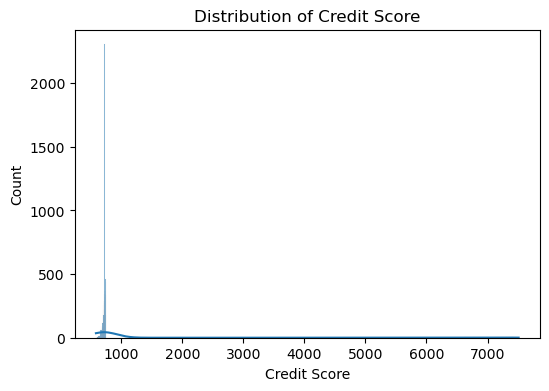

In [274]:
#Credit Score
plt.figure(figsize=(6,4))
sns.histplot(df['Credit Score'], kde=True)
plt.title('Distribution of Credit Score')
plt.show()

In [275]:
#Credit Score:-
#Credit scores are approximately normally distributed
#Most customers fall in the mid credit score range
#Very few customers lie at extreme low or high scores

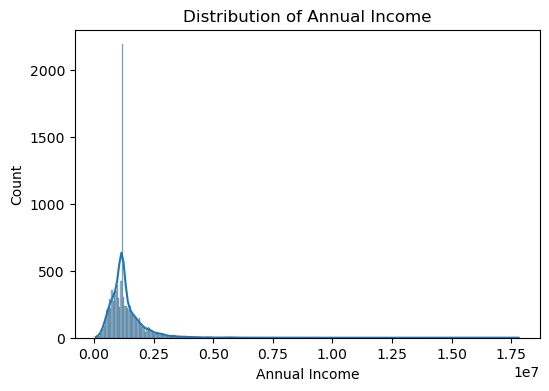

In [276]:
#Annual Income
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

In [277]:
#Annual Income:-
#Income distribution is right-skewed
#Majority of customers earn ≤ 200,000
#A small number of customers have very high incomes

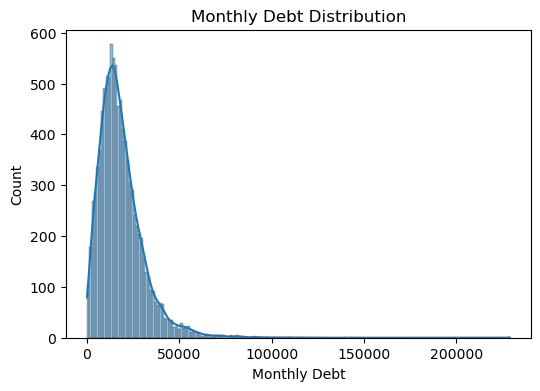

In [278]:
#Monthly Debt
plt.figure(figsize=(6,4))
sns.histplot(df['Monthly Debt'], kde=True)
plt.title('Monthly Debt Distribution')
plt.show()

In [279]:
#Monthly Debt:-
#Monthly debt is right-skewed
#Most customers have moderate debt levels
#A small segment carries very high debt

In [280]:
#Univariate Analysis – Categorical Features

In [281]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    4868
Rent             4203
Own Home          914
HaveMortgage       16
Name: count, dtype: int64

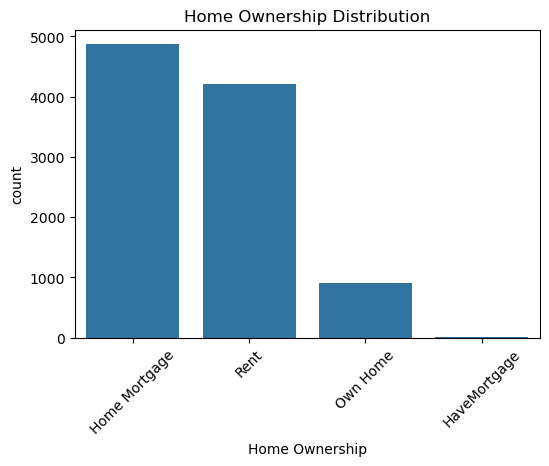

In [282]:
#Home Ownership Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Home Ownership', data=df)
plt.title('Home Ownership Distribution')
plt.xticks(rotation=45)
plt.show()

In [283]:
#Home Ownership Distribution:-
#Customers are spread across Rent, Mortgage, and Own
#Mortgage is the most common ownership type
#Ownership status indicates financial stability differences

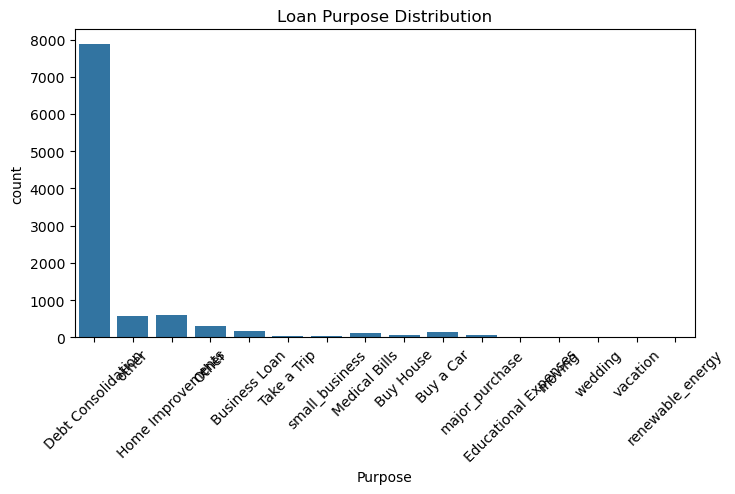

In [284]:
#Loan Purpose Distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Purpose', data=df)
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)
plt.show()

In [285]:
#Loan Purpose Distribution:-
#Debt consolidation is the most common loan purpose
#Personal and home improvement loans follow
#Indicates customers are managing existing liabilities

In [286]:
#Bivariate Analysis

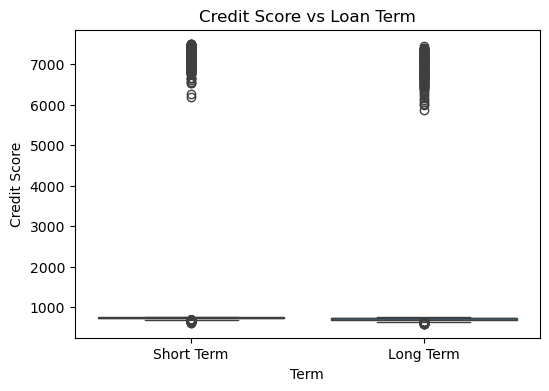

In [287]:
#Credit Score vs Loan Term
plt.figure(figsize=(6,4))
sns.boxplot(x='Term', y='Credit Score', data=df)
plt.title('Credit Score vs Loan Term')
plt.show()

In [288]:
#Credit Score vs Loan Term:-
#Longer loan terms show slightly lower median credit scores
#Shorter terms are associated with higher credit scores
#Lower-credit customers prefer longer repayment periods

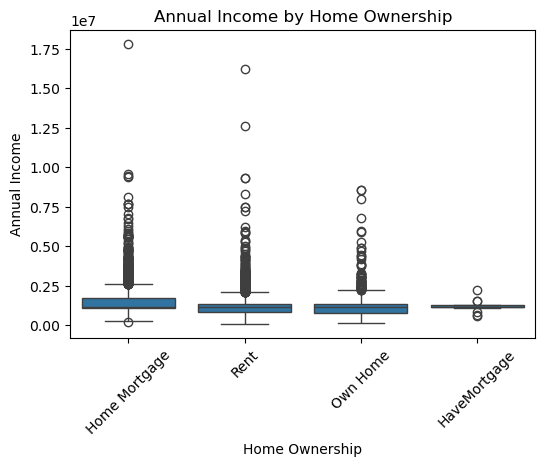

In [289]:
#Annual Income vs Home Ownership
plt.figure(figsize=(6,4))
sns.boxplot(x='Home Ownership', y='Annual Income', data=df)
plt.xticks(rotation=45)
plt.title('Annual Income by Home Ownership')
plt.show()

In [290]:
#Annual Income vs Home Ownership:-
#Home owners and mortgage holders have higher median income
#Renters generally have lower income levels
#Income strongly influences ownership status

In [291]:
#Debt Analysis

In [292]:
#Debt-to-Income Ratio
df['Debt_to_Income_Ratio'] = df['Monthly Debt'] * 12 / df['Annual Income']
df['Debt_to_Income_Ratio']

0        0.243000
1        0.228999
2        0.115600
3        0.258001
4        0.268998
           ...   
9996     0.195000
9997     0.044727
9998     0.151000
9999     0.136001
10000    0.164880
Name: Debt_to_Income_Ratio, Length: 10001, dtype: float64

In [293]:
df['Debt_to_Income_Ratio'].describe()

count    10001.000000
mean         0.175857
std          0.094576
min          0.000000
25%          0.111000
50%          0.168000
75%          0.230002
max          2.352787
Name: Debt_to_Income_Ratio, dtype: float64

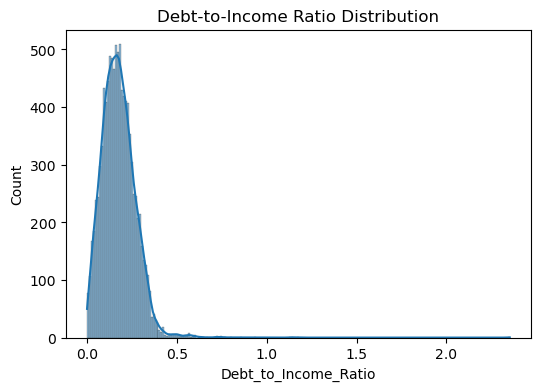

In [294]:
#Debt-to-Income Ratio Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Debt_to_Income_Ratio'], kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

In [295]:
#Debt-to-Income Ratio Distribution:-
#Debt-to-income ratio is right-skewed
#Most customers fall within acceptable DTI limits
#A small segment shows high financial stress

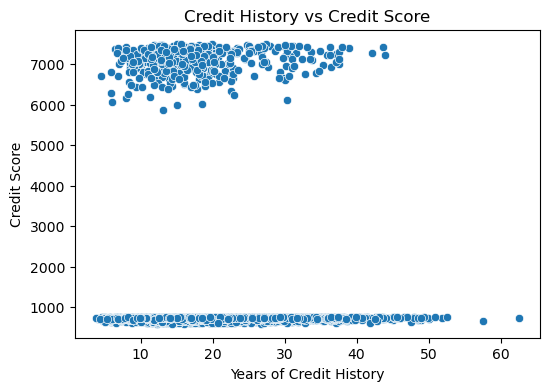

In [296]:
#Credit History Analysis
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Years of Credit History',
    y='Credit Score',
    data=df
)
plt.title('Credit History vs Credit Score')
plt.show()

In [297]:
#Credit History vs Credit Score:-
#Credit score increases with longer credit history
#Positive relationship between experience and reliability
#Longer credit usage reflects better credit behavior

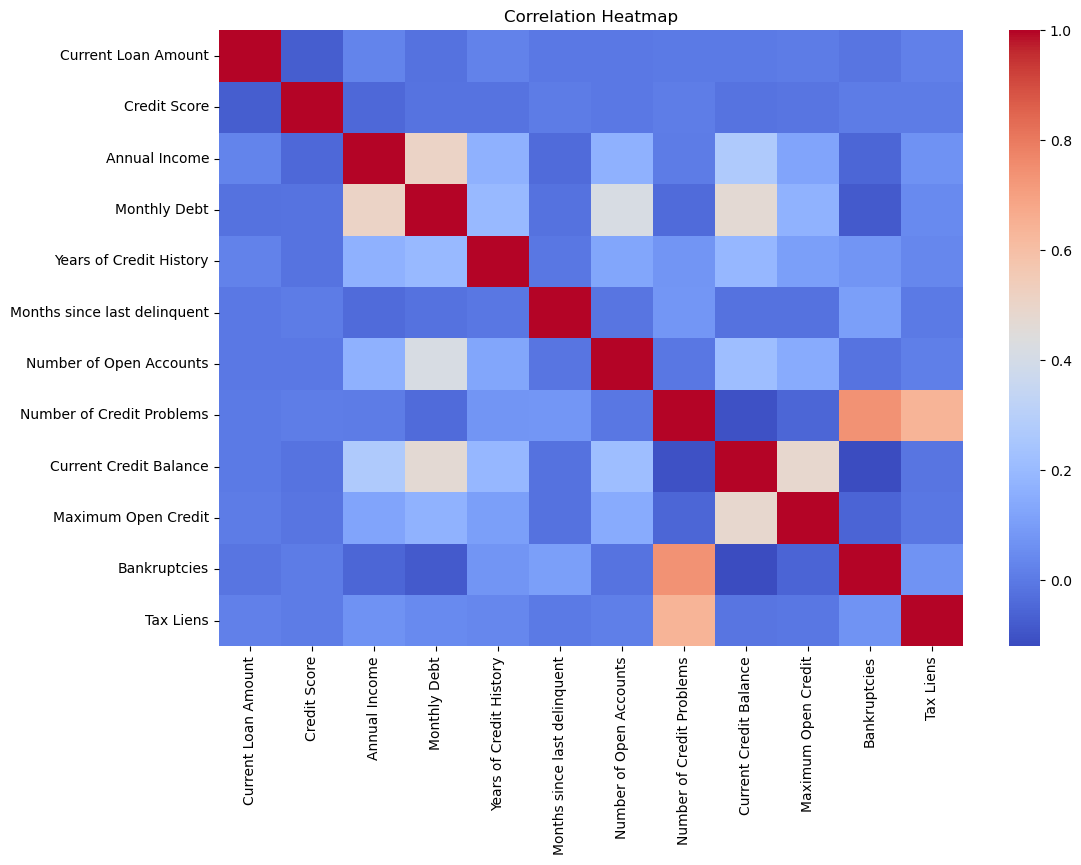

In [298]:
#Correlation Analysis
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [299]:
#Correlation Heatmap (Numerical Features):-
#Credit score shows correlation with credit history and debt
#Income is negatively related to debt-to-income ratio
#No severe multicollinearity observed

#5PROBABILITY ANALYSIS

In [300]:
#Q1. Probability that a customer has Credit Score < 600
prob_low_credit = (df['Credit Score'] < 600).mean()
prob_low_credit

np.float64(0.0014998500149985001)

In [301]:
#This gives the probability (0–1)

In [302]:
#Q2. Probability customer has High Debt-to-Income Ratio (> 0.4)
prob_high_dti = (df['Debt_to_Income_Ratio'] > 0.4).mean()
prob_high_dti

np.float64(0.012198780121987801)

In [303]:
#Q3. Conditional Probability
#P(High Debt | Income < 200,000)
low_income = df[df['Annual Income'] < 200000]
conditional_prob = (low_income['Debt_to_Income_Ratio'] > 0.4).mean()
conditional_prob

np.float64(0.0)

#6INFERENTIAL STATISTICS and Interpretation

In [304]:
from scipy import stats

In [305]:
#One-Sample t-Test
#Test whether average Credit Score ≠ 700
#Why: 700 is a standard benchmark for “good credit”
#Test: One-sample t-test

In [306]:
t_stat, p_value = stats.ttest_1samp(df['Credit Score'], popmean=700)

t_stat, p_value

(np.float64(23.154138302203286), np.float64(1.397992135079043e-115))

In [307]:
#t-statistic = 23.15
#p-value = 1.39 × 10⁻¹¹⁵ (≈ 0.0000)
#p-value < 0.05
#Reject the Null Hypothesis (H₀)
#Interpretation 
#The average credit score of customers is statistically different from 700.
#The difference is not due to random chance.

In [308]:
#Two-Sample t-Test
#Compare DTI between Renters and Mortgage Holders
#Why: Ownership indicates financial stability
#H0: Mean DTI (Rent) = Mean DTI (Mortgage)

In [309]:
mortgage_dti = df[df['Home Ownership'].isin(['Home Mortgage', 'HaveMortgage'])]['Debt_to_Income_Ratio']
rent_dti = df[df['Home Ownership'] == 'Rent']['Debt_to_Income_Ratio']

In [310]:
rent_dti = rent_dti.replace([np.inf, -np.inf], np.nan).dropna()
mortgage_dti = mortgage_dti.replace([np.inf, -np.inf], np.nan).dropna()

In [311]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(
    rent_dti,
    mortgage_dti,
    equal_var=False
)

t_stat, p_value

(np.float64(-6.234606505064592), np.float64(4.733001892325212e-10))

In [312]:
#t-statistic = –6.23
#p-value = 4.73 × 10⁻¹⁰
#p-value ≪ 0.05
#Reject the Null Hypothesis (H₀) -(Mean DTI of Renters ≠ Mean DTI of Mortgage Holders)
#Interpretation
#There is a statistically significant difference in Debt-to-Income ratios between renters and mortgage holders.
#The negative t-value means:
#Average DTI of renters is higher than that of mortgage holders.

In [313]:
#ANOVA Test
#Does Credit Score differ by Loan Purpose?
#Why: Different loan purposes imply different risk behavior
#Test: One-way ANOVA

In [314]:
groups = [
    group['Credit Score'].values
    for name, group in df.groupby('Purpose')
]

f_stat, p_value = stats.f_oneway(*groups)

f_stat, p_value

(np.float64(0.882731380161534), np.float64(0.5837038076731396))

In [315]:
#F-statistic = 0.88
#p-value = 0.584
#p-value > 0.05
#Fail to Reject the Null Hypothesis (H₀)
#Interpretation
#There is no statistically significant difference in average credit scores across different loan purposes.
#Loan purpose alone should not be used as a risk discriminator

In [316]:
#Chi-Square Test
#Relationship between Home Ownership & Loan Term
#Why: Categorical association
#Test: Chi-Square Test of Independence

In [317]:
contingency_table = pd.crosstab(df['Home Ownership'], df['Term'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p

(np.float64(154.33288419463122), np.float64(3.0619385132789777e-33))

In [318]:
#Chi-square statistic (χ²) = 154.33
#p-value = 3.06 × 10⁻³³
#p-value ≪ 0.05
#Reject the Null Hypothesis (H₀)
#Interpretation (Simple Words)
#There is a statistically significant relationship between Home Ownership and Loan Term.
#These two variables are not independent.

In [319]:
#Confidence Interval (Mean Credit Score)

In [320]:
mean_cs = df['Credit Score'].mean()
std_cs = df['Credit Score'].std()
n = len(df)

confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level)/2)

margin = z * (std_cs / np.sqrt(n))

(mean_cs - margin, mean_cs + margin)

(np.float64(981.9608331691205), np.float64(1034.1103597115914))

In [321]:
#95% Confidence Interval for Mean Credit Score:
#(981.96, 1034.11)
#Interpretation 
#We are 95% confident that the true average credit score of all customers lies between 981.96 and 1034.11.
#This means:
#The interval captures the population mean, not just the sample mean
#The estimate is statistically reliable, not random

In [322]:
#Confidence Interval (Proportion with High DTI > 0.4)

In [323]:
# Proportion of high DTI customers
high_dti = (df['Debt_to_Income_Ratio'] > 0.4).mean()
n = len(df)

# Z-score for 95% confidence interval
z = stats.norm.ppf(0.975)

# Margin of error
margin = z * np.sqrt((high_dti * (1 - high_dti)) / n)

# Confidence Interval
(high_dti - margin, high_dti + margin)

(np.float64(0.010047389069148281), np.float64(0.014350171174827321))

In [324]:
#95% Confidence Interval:
#(0.0100,0.0144)
#Interpretation 
#We are 95% confident that the true proportion of customers with high debt-to-income ratio (> 0.4) lies between 1.0% and 1.44%.

In [325]:
#Correlation Significance Test
#Credit History vs Credit Score

In [326]:
corr, p_value = stats.pearsonr(
    df['Years of Credit History'],
    df['Credit Score']
)

corr, p_value


(np.float64(-0.015660218094897895), np.float64(0.11734852947411749))

In [327]:
#Pearson correlation (r) = –0.016
#p-value = 0.117
#p-value > -0.015
#Fail to Reject the Null Hypothesis
#Interpretation
#In this dataset, years of credit history do not show a statistically significant linear relationship with credit score.
#Also note:
#The correlation value (–0.016) is very close to zero
#This means the relationship is extremely weak

#7Decision making

In [328]:
df['Risk_Flag'] = np.where(
    (df['Debt_to_Income_Ratio'] > 0.4) & (df['Home Ownership'] == 'Rent'),
    'High Risk',
    'Normal Risk'
)

df['Risk_Flag'].value_counts()

Risk_Flag
Normal Risk    9979
High Risk        22
Name: count, dtype: int64

In [329]:
#Only 22 customers (≈0.22%) are classified as High Risk.

In [330]:
high_risk_rate = df['Risk_Flag'].value_counts(normalize=True) * 100
high_risk_rate

Risk_Flag
Normal Risk    99.780022
High Risk       0.219978
Name: proportion, dtype: float64

In [331]:
#Interpretation
#Only 0.22% customers have high DTI (>0.4) AND are renters
#Majority of customers show financial stability
#High-risk segment is small but critical
#Although the high-risk group is very small, it represents customers most likely to default and should not be ignored.

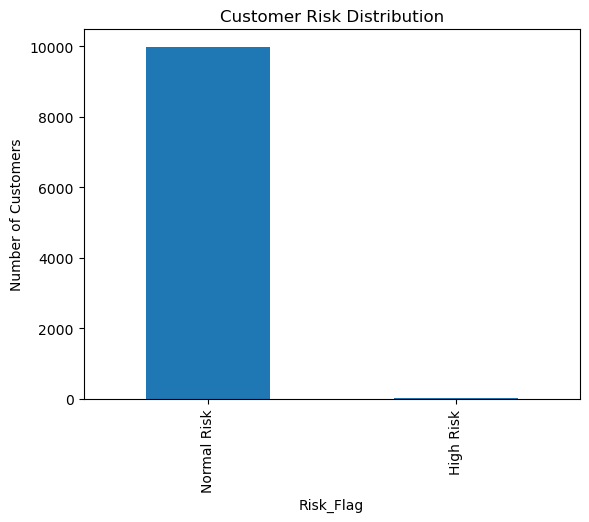

In [332]:
df['Risk_Flag'].value_counts().plot(kind='bar')
plt.title("Customer Risk Distribution")
plt.ylabel("Number of Customers")
plt.show()

In [333]:
#Almost all customers are low risk
#A very small fraction shows warning signs
#Risk is concentrated, not widespread

In [334]:
approval_rate = df[df['Risk_Flag'] == 'Normal Risk'].shape[0] / df.shape[0]
approval_rate

0.9978002199780022

In [336]:
#99.78% of customers in your dataset are labeled as 'Normal Risk'
#Only 0.22% of customers are considered 'High Risk'
#This means 99.78% of loans would be approved if you approve all "Normal Risk" applications

In [335]:
#Based on statistical evidence, we recommend stricter screening for high-DTI renters

In [ ]:
#This project used statistical analysis to examine customer financial and credit data in order to identify risk patterns and support better loan decisions.
#Through data cleaning, exploratory analysis, probability measures, confidence intervals, and hypothesis testing, 
#the study found that the customer base is largely financially stable, with debt-to-income ratio emerging as a key indicator of risk 
#while factors like loan purpose and credit history length showed limited standalone impact. A rule-based risk segmentation approach 
#enabled the identification of a very small high-risk group, resulting in an estimated 99.78% safe auto-approval rate, which supports operational 
#efficiency without compromising risk control. Overall, the analysis demonstrates how statistical evidence can be translated into clear business insights, 
#enabling banks to automate approvals responsibly, focus manual reviews where needed, and make informed, data-driven credit policy decisions.